In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn_pandas import DataFrameMapper, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import pandas as pd

In [6]:
dataFrame = pd.read_csv("../data/featured/featured.csv")

In [9]:
df = dataFrame
bf = df

In [10]:
bf.head()

,user_name,text,retweet_count,tweet_age,sentiment,text_length,hashtags_count,usermention_count,urls_count
0,katyperry,touched carters story able pls help w chance d...,1381,0,0.50,76,0,0,1
1,ladygaga,rt thwofd cynthia germanotta momgerm explains ...,550,4,0.00,95,1,4,0
2,TheEllenShow,littlebigshots thursday theres better way cele...,347,0,0.25,80,1,0,1
3,TheEllenShow,tuesday mood kaceymusgraves,87,0,0.00,27,0,1,1
4,TheEllenShow,someone watching show gonna way riches,101,0,0.00,38,0,0,1


In [11]:
categories = bf['retweet_count']
desc = bf['text'].fillna('')
 
vectoriser = TfidfVectorizer()
features = vectoriser.fit_transform(desc)
 
features.shape
#(35182, 66023)

(10585, 18564)

In [12]:
x, x_test, y, y_test = train_test_split(features,categories,test_size=0.2,train_size=0.8, random_state = 0)
 
clf = MultinomialNB().fit(x, y)
predicted = clf.predict(x_test)

In [15]:
clf.score(x_test, y_test)

0.09211147850732168

In [16]:
data = bf.fillna('')
data.head()

,user_name,text,retweet_count,tweet_age,sentiment,text_length,hashtags_count,usermention_count,urls_count
0,katyperry,touched carters story able pls help w chance d...,1381,0,0.50,76,0,0,1
1,ladygaga,rt thwofd cynthia germanotta momgerm explains ...,550,4,0.00,95,1,4,0
2,TheEllenShow,littlebigshots thursday theres better way cele...,347,0,0.25,80,1,0,1
3,TheEllenShow,tuesday mood kaceymusgraves,87,0,0.00,27,0,1,1
4,TheEllenShow,someone watching show gonna way riches,101,0,0.00,38,0,0,1


In [18]:
#Add the features of the dataframe that you want to transform and/or combine
mapper = DataFrameMapper([
     ('text', TfidfVectorizer()),
     ('user_name', TfidfVectorizer()),
     ('tweet_age', None),
     ('sentiment', None),
     ('text_length', None),
     ('hashtags_count', None),
     ('usermention_count', None),
     ('urls_count', None),
 ])
 
"""
Use the fit_transform method to transform the old dataframe into a new one
that can be fed to the machine learning algorithm.
"""
 
#sample Usage
features = mapper.fit_transform(data)
categories = data['retweet_count']
 
# Split the data between train and test
x, x_test, y, y_test = train_test_split(features,categories,test_size=0.2,train_size=0.8, random_state = 0)
 
clf = RandomForestClassifier(random_state=0)
clf.fit(x, y)
 
predicted = clf.predict(x_test)


In [54]:
import seaborn as sns
import scipy as sp
import xgboost as xgb

In [ ]:
model_xgb = xgb.XGBRegressor(max_depth=4, learning_rate=0.01, n_estimators=596)
model_xgb.fit(x, y)

In [ ]:
y_pred = model_xgb.predict(X_test)
RMSE = mean_squared_error(y_test, y_pred)**0.5
print(RMSE)

In [32]:
from sklearn import linear_model
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
# Make predictions using the testing set
d_y_pred = regr.predict(x_test)

In [ ]:
import matplotlib.pyplot as plt
# plot it as in the example at http://scikit-learn.org/
plt.scatter(x, y,  color='black')
plt.plot(x, regr.predict(x_test), color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

In [52]:
d_y_pred[65]

17732.705224387075

In [49]:
categories[0]

1381

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

Coefficients: 
 [-1.29408575e+05  3.78251903e+03 -2.97730892e+04 ... -5.17325412e+01
  1.69203177e+03 -3.53880746e+03]
Mean squared error: 3564454131.29
Variance score: -344.38


ValueError: x and y must be the same size

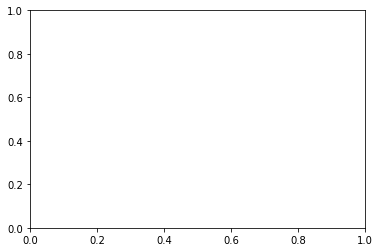

In [45]:


# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, d_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, d_y_pred))

# Plot outputs
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, d_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [19]:
clf.score(x_test, y_test)

0.10297590930562116

In [20]:
features.shape

(10585, 18659)

In [30]:
printreport(y_test, predicted)

Predicted  0      1      2      3      4      5      6      7      8      \
Actual                                                                     
0            191      4      0      0      0      0      0      0      0   
1             24      2      1      0      0      0      0      0      0   
2              3      5      0      0      0      1      0      1      0   
3              2      1      0      1      1      1      1      0      0   
4              2      0      0      1      1      0      1      0      0   
5              1      1      0      0      0      1      1      0      2   
6              0      1      0      2      0      0      1      3      1   
7              0      1      1      1      0      4      1      1      4   
8              2      0      0      0      0      2      1      0      4   
9              0      0      0      1      0      1      2      0      3   
10             1      0      0      0      1      1      2      0      1   
11          

NameError: name 'classification_report' is not defined

In [29]:
def printreport(exp, pred):
    print(pd.crosstab(exp, pred, rownames=['Actual'], colnames=['Predicted']))
 
    print('\n \n')
    print(classification_report(exp, pred))
 
printreport(y_test, predicted)

Predicted  0      1      2      3      4      5      6      7      8      \
Actual                                                                     
0            191      4      0      0      0      0      0      0      0   
1             24      2      1      0      0      0      0      0      0   
2              3      5      0      0      0      1      0      1      0   
3              2      1      0      1      1      1      1      0      0   
4              2      0      0      1      1      0      1      0      0   
5              1      1      0      0      0      1      1      0      2   
6              0      1      0      2      0      0      1      3      1   
7              0      1      1      1      0      4      1      1      4   
8              2      0      0      0      0      2      1      0      4   
9              0      0      0      1      0      1      2      0      3   
10             1      0      0      0      1      1      2      0      1   
11          

NameError: name 'classification_report' is not defined

In [3]:
df = pd.read_csv("feat.csv")
bf = df

In [15]:
def rt(x):
    for text in x:    
        return vectorizer.transform(text)

In [16]:
df['z'] = df.text.apply(rt)

ValueError: Iterable over raw text documents expected, string object received.

In [8]:
vectorizer = CountVectorizer(min_df=1)
X = vectorizer.fit_transform(df.text)
count_vect_df = pd.DataFrame(X.todense(), columns=vectorizer.get_feature_names())
pd.concat([df, count_vect_df], axis=1)

ValueError: np.nan is an invalid document, expected byte or unicode string.

In [ ]:
vectorizer.transform(['Something completely new.']).toarray()

In [31]:
from sklearn.pipeline import Pipeline, FeatureUnion
X_train = df
classifier = Pipeline([
    ('features', FeatureUnion([
        ('text', Pipeline([
            ('vectorizer', CountVectorizer()),
        ])),
        ('fav', Pipeline([
            ('urls_count', df.favorite_count),
        ]))
    ])),
    ('clf',OneVsRestClassifier(LinearSVC()))])

classifier.fit(X_train, y_train)
y_pred_class = classifier.predict(X_test)
y_pred_class

NameError: name 'CountVectorizer' is not defined

In [26]:
print(train_bow)

  (0, 67)	1
  (0, 28)	1
  (1, 73)	1
  (1, 61)	1
  (1, 56)	1
  (1, 64)	1
  (1, 88)	1
  (1, 30)	1
  (1, 80)	1
  (1, 23)	1
  (1, 35)	1
  (1, 34)	1
  (1, 90)	1
  (1, 78)	1
  (1, 31)	1
  (1, 85)	1
  (1, 13)	1
  (2, 15)	1
  (2, 83)	1
  (2, 6)	1
  (2, 87)	1
  (2, 21)	1
  (2, 69)	1
  (2, 0)	1
  (2, 50)	1
  :	:
  (8, 58)	1
  (8, 70)	1
  (8, 65)	1
  (8, 7)	1
  (8, 45)	1
  (8, 74)	1
  (8, 75)	1
  (8, 63)	1
  (8, 1)	1
  (8, 72)	1
  (8, 62)	1
  (8, 17)	1
  (8, 66)	1
  (8, 32)	1
  (8, 21)	1
  (8, 50)	1
  (8, 73)	1
  (8, 34)	1
  (8, 90)	2
  (9, 20)	1
  (9, 3)	1
  (9, 82)	1
  (9, 77)	1
  (9, 8)	1
  (9, 27)	1


In [34]:
vectorizer = CountVectorizer(min_df=1)
corpus = [
  'This is the first document.',
  'This is the second second document.',
  'And the third one',
  'Is this the first document?',
]
X = vectorizer.fit_transform(corpus)

words = vectorizer.get_feature_names()
print(words)
words_counts = X.toarray()
print(words_counts)

transformer = TfidfTransformer()
tfidf = transformer.fit_transform(words_counts)
print(tfidf.toarray())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
[[0 1 1 1 0 0 1 0 1]
 [0 1 0 1 0 2 1 0 1]
 [1 0 0 0 1 0 1 1 0]
 [0 1 1 1 0 0 1 0 1]]
[[0.         0.43877674 0.54197657 0.43877674 0.         0.
  0.35872874 0.         0.43877674]
 [0.         0.27230147 0.         0.27230147 0.         0.85322574
  0.22262429 0.         0.27230147]
 [0.55280532 0.         0.         0.         0.55280532 0.
  0.28847675 0.55280532 0.        ]
 [0.         0.43877674 0.54197657 0.43877674 0.         0.
  0.35872874 0.         0.43877674]]


## check put each row into text and also put vector to each coloum try to use pandas within this or pipline form sklearn

In [23]:
# list of text documents
text = ["The quick brown fox jumped over the lazy dog.", "me hi"]
# create the transform
vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# summarize
print(vectorizer.vocabulary_)
# encode document
vector = vectorizer.transform(text)
# summarize encoded vector
print(vector.shape)
print(type(vector))
print(vector.toarray())

{'the': 9, 'quick': 8, 'brown': 0, 'fox': 2, 'jumped': 4, 'over': 7, 'lazy': 5, 'dog': 1, 'me': 6, 'hi': 3}
(2, 10)
<class 'scipy.sparse.csr.csr_matrix'>
[[1 1 1 0 1 1 0 1 1 2]
 [0 0 0 1 0 0 1 0 0 0]]
